# Air_Quality_Analysis in Bengaluru(2019-2020)
This project is based on air_quality in bengaluru before and under lockdown.
As the Covid-induced lockdown, pollution level in Bengaluru is back to pre-pandemic levels in 2019,thereby indicating vehicular movement as one of the biggest contributors of air pollution across urban centres.
Data were recorded from 2019 to 2020(one year)representing the longest freely available recordings of on field deployed of air quality pollutants (PM10, PM2.5, SO2, NO2, CO, O3,NH3 and other pollutants).
Based on these parameters,we are creating a small project by analysing the air_quality in Bengaluru with the help of linear regression models and dataset.
Missing values are tagged with -200 value

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

# Loading the Dataset

In [2]:
Data = pd.read_csv('Bengulur_Air_Quality.csv')

# About the Dataset

In [3]:
#gives the 1st 5 row command name attribute and variables
Data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Bengaluru,01-01-2019,61.55,107.76,14.75,38.19,41.30,17.97,0.98,8.29,56.91,0.33,1.24,NaN,128,Moderate
1,Bengaluru,02-01-2019,47.27,92.47,12.94,39.73,41.65,20.45,1.06,10.22,51.25,0.32,1.25,NaN,103,Moderate
2,Bengaluru,03-01-2019,48.86,96.42,16.74,46.55,51.87,29.72,1.01,8.15,46.40,0.40,1.66,NaN,101,Moderate
3,Bengaluru,04-01-2019,51.35,105.52,17.37,45.87,50.21,24.95,1.09,5.76,41.42,0.53,1.66,NaN,106,Moderate
4,Bengaluru,05-01-2019,46.57,99.10,15.87,41.74,44.40,18.17,1.03,6.13,50.61,0.39,1.22,NaN,104,Moderate


In [4]:
#gives last 5 rows of the dataset
Data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
726,Bengaluru,27-12-2020,57.28,107.80,12.41,31.17,34.50,16.37,0.90,5.67,55.30,0.38,1.66,NaN,117,Moderate
727,Bengaluru,28-12-2020,68.37,111.01,9.44,31.77,32.00,17.22,0.91,6.12,57.62,0.37,1.31,NaN,123,Moderate
728,Bengaluru,29-12-2020,65.81,106.31,11.15,31.32,32.97,17.70,0.89,6.07,47.62,0.28,1.11,NaN,124,Moderate
729,Bengaluru,30-12-2020,64.29,100.07,8.74,28.97,27.60,16.00,0.85,5.34,64.73,0.24,0.90,NaN,127,Moderate
730,Bengaluru,31-12-2020,63.77,107.44,15.48,37.46,40.95,16.72,1.02,7.25,55.18,0.39,1.44,NaN,123,Moderate


In [5]:
#number of rows and columns in the dataset
Data.shape

(731, 16)

In [6]:
#Generate descriptive statictics
Data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,0.0,731.000000
mean,33.771778,74.449617,10.283201,26.379412,29.093776,15.053899,0.894364,6.071601,35.538851,0.702914,4.416772,NaN,87.346101
std,16.244925,27.500218,6.330375,9.648879,11.131893,4.516807,0.170895,1.289720,15.666184,0.538559,7.660972,NaN,26.494544
min,7.850000,19.340000,2.340000,8.990000,9.400000,4.780000,0.520000,2.970000,8.900000,0.080000,0.370000,NaN,40.000000
25%,20.600000,52.645000,6.025000,18.810000,22.420000,12.210000,0.770000,5.140000,22.280000,0.380000,1.525000,NaN,66.000000
50%,29.230000,70.800000,8.650000,25.980000,27.960000,14.750000,0.870000,6.110000,34.360000,0.560000,2.180000,NaN,82.000000
75%,44.500000,94.050000,12.960000,32.380000,34.045000,17.505000,1.010000,6.940000,47.530000,0.870000,3.265000,NaN,105.000000
max,108.300000,181.410000,60.140000,63.570000,106.260000,41.220000,1.720000,13.040000,82.310000,7.600000,44.930000,NaN,225.000000


# Information about the dataset

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        731 non-null    object 
 1   Date        731 non-null    object 
 2   PM2.5       731 non-null    float64
 3   PM10        731 non-null    float64
 4   NO          731 non-null    float64
 5   NO2         731 non-null    float64
 6   NOx         731 non-null    float64
 7   NH3         731 non-null    float64
 8   CO          731 non-null    float64
 9   SO2         731 non-null    float64
 10  O3          731 non-null    float64
 11  Benzene     731 non-null    float64
 12  Toluene     731 non-null    float64
 13  Xylene      0 non-null      float64
 14  AQI         731 non-null    int64  
 15  AQI_Bucket  731 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory usage: 91.5+ KB


# Data Pre Processing
Pre-processing refers to the transformations applied to your data before feeding it to the Machine Learning algorithm, which affects the accuracy of final outcome. In python, scikit-learn library has a pre-built functionality under sklearn.preprocessing.Pandas library also offer such capabilities. There are many more options for pre-processing which we’ll explore

# Checking with missing data

In [8]:
Data.isnull().sum()

City            0
Date            0
PM2.5           0
PM10            0
NO              0
NO2             0
NOx             0
NH3             0
CO              0
SO2             0
O3              0
Benzene         0
Toluene         0
Xylene        731
AQI             0
AQI_Bucket      0
dtype: int64

# Deleting missing values

In [9]:
DataCleaned=Data.dropna()
DataCleaned.isnull().sum()

City          0.0
Date          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64

In [10]:
#to fill the missing value
xmean=Data["Xylene"].mean()
Data["Xylene"].fillna(xmean,inplace=True)

In [11]:
# Now we can see all columns have zero missing values
print(Data.isnull().sum())
print(Data.info())

City            0
Date            0
PM2.5           0
PM10            0
NO              0
NO2             0
NOx             0
NH3             0
CO              0
SO2             0
O3              0
Benzene         0
Toluene         0
Xylene        731
AQI             0
AQI_Bucket      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        731 non-null    object 
 1   Date        731 non-null    object 
 2   PM2.5       731 non-null    float64
 3   PM10        731 non-null    float64
 4   NO          731 non-null    float64
 5   NO2         731 non-null    float64
 6   NOx         731 non-null    float64
 7   NH3         731 non-null    float64
 8   CO          731 non-null    float64
 9   SO2         731 non-null    float64
 10  O3          731 non-null    float64
 11  Benzene     731 non-null    float64
 12  Toluene     731

In [12]:
# Finding out the mode value for color column
ModeValueForColor=Data['PM2.5'].mode()[0]
print('mode value for PM2.5 column is: ',ModeValueForColor)

mode value for PM2.5 column is:  18.62


In [13]:
Data['PM2.5'].value_counts()

20.16    3
18.62    3
21.84    3
20.75    3
19.86    3
        ..
20.82    1
17.64    1
10.98    1
11.18    1
63.77    1
Name: PM2.5, Length: 671, dtype: int64

In [14]:
#find columns name air quality is working as data frame
Data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [15]:
#Datatype of each attribute
Data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI             int64
AQI_Bucket     object
dtype: object

In [16]:
# FINDING -200 USING SIMPLE FOR LOOPS WHICH CAN ALSO BE DONE WITH VALUE_COUNTS AND THEN REPLACED
l=[]
for i in range(len(Data.columns)):
    f=Data.columns[i]
    count=0
    for j in range(len(Data[f])):
        if Data[f][j]==-200:
            count+=1
    l.append((f,count))                     
print("Values from each column that needs to be replaced with avg \n ",l)

Values from each column that needs to be replaced with avg 
  [('City', 0), ('Date', 0), ('PM2.5', 0), ('PM10', 0), ('NO', 0), ('NO2', 0), ('NOx', 0), ('NH3', 0), ('CO', 0), ('SO2', 0), ('O3', 0), ('Benzene', 0), ('Toluene', 0), ('Xylene', 0), ('AQI', 0), ('AQI_Bucket', 0)]


In [17]:
num=Data._get_numeric_data()
num[num<0]=0
Data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Bengaluru,01-01-2019,61.55,107.76,14.75,38.19,41.30,17.97,0.98,8.29,56.91,0.33,1.24,NaN,128,Moderate
1,Bengaluru,02-01-2019,47.27,92.47,12.94,39.73,41.65,20.45,1.06,10.22,51.25,0.32,1.25,NaN,103,Moderate
2,Bengaluru,03-01-2019,48.86,96.42,16.74,46.55,51.87,29.72,1.01,8.15,46.40,0.40,1.66,NaN,101,Moderate
3,Bengaluru,04-01-2019,51.35,105.52,17.37,45.87,50.21,24.95,1.09,5.76,41.42,0.53,1.66,NaN,106,Moderate
4,Bengaluru,05-01-2019,46.57,99.10,15.87,41.74,44.40,18.17,1.03,6.13,50.61,0.39,1.22,NaN,104,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Bengaluru,27-12-2020,57.28,107.80,12.41,31.17,34.50,16.37,0.90,5.67,55.30,0.38,1.66,NaN,117,Moderate
727,Bengaluru,28-12-2020,68.37,111.01,9.44,31.77,32.00,17.22,0.91,6.12,57.62,0.37,1.31,NaN,123,Moderate
728,Bengaluru,29-12-2020,65.81,106.31,11.15,31.32,32.97,17.70,0.89,6.07,47.62,0.28,1.11,NaN,124,Moderate
729,Bengaluru,30-12-2020,64.29,100.07,8.74,28.97,27.60,16.00,0.85,5.34,64.73,0.24,0.90,NaN,127,Moderate


pollutants in air(2019-2020)


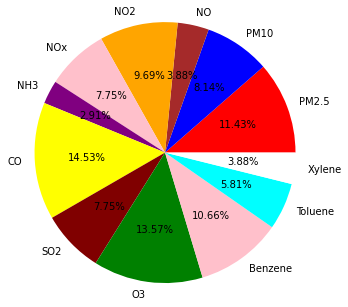

In [18]:
pollutants=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
color=['red','blue','brown','orange','pink','purple','yellow','maroon','green','pink','cyan','white']
plt.pie(slices,labels=pollutants,colors=color,radius=1.5,autopct='%1.2f%%')
print("pollutants in air(2019-2020)")
plt.show()

# Exploration

0      41.30
1      41.65
2      51.87
3      50.21
4      44.40
       ...  
726    34.50
727    32.00
728    32.97
729    27.60
730    40.95
Name: NOx, Length: 731, dtype: float64


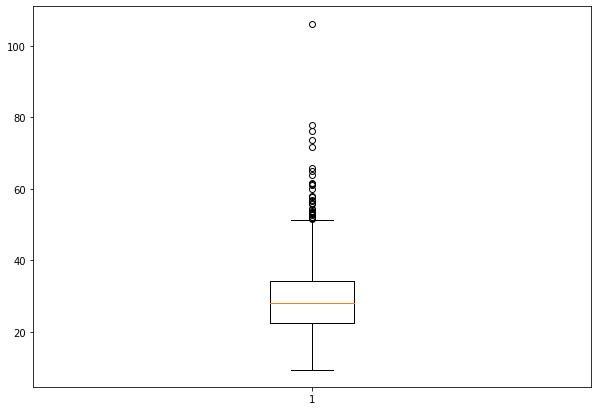

In [19]:
#Creating dataset 
np.random.seed(10) 
data=Data["NOx"]
print(data)
fig = plt.figure(figsize =(10, 7)) 

# Creating plot 
plt.boxplot(data) 

# show plot 
plt.show()

In [20]:
Data['Date']=pd.to_datetime(Data.Date)
Data1=Data.loc[Data['Date']<'31-12-2019']
Data1=Data1.sort_values(by='Date')
Data1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Bengaluru,2019-01-01,61.55,107.76,14.75,38.19,41.30,17.97,0.98,8.29,56.91,0.33,1.24,NaN,128,Moderate
31,Bengaluru,2019-01-02,49.67,99.62,9.15,37.21,33.41,14.68,0.87,5.35,63.66,1.09,3.19,NaN,109,Moderate
59,Bengaluru,2019-01-03,58.18,125.30,13.52,44.64,44.92,19.94,1.05,4.93,53.30,3.44,10.62,NaN,143,Moderate
90,Bengaluru,2019-01-04,53.46,110.50,11.03,35.35,32.36,16.31,1.01,4.73,49.03,1.21,3.68,NaN,126,Moderate
120,Bengaluru,2019-01-05,42.75,74.84,7.54,21.81,23.34,15.57,0.99,4.72,55.94,0.23,1.31,NaN,111,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,Bengaluru,2019-12-26,44.27,87.08,7.56,29.46,29.65,14.55,1.03,6.25,43.66,2.08,21.30,NaN,95,Satisfactory
360,Bengaluru,2019-12-27,43.32,87.09,9.56,31.24,32.59,14.71,1.09,6.60,39.42,1.66,41.25,NaN,98,Satisfactory
361,Bengaluru,2019-12-28,35.24,70.75,7.86,26.94,27.78,13.37,0.97,7.38,37.81,0.93,44.93,NaN,82,Satisfactory
362,Bengaluru,2019-12-29,38.53,73.77,6.56,26.20,26.31,13.02,0.92,7.39,43.50,0.63,23.56,NaN,80,Satisfactory


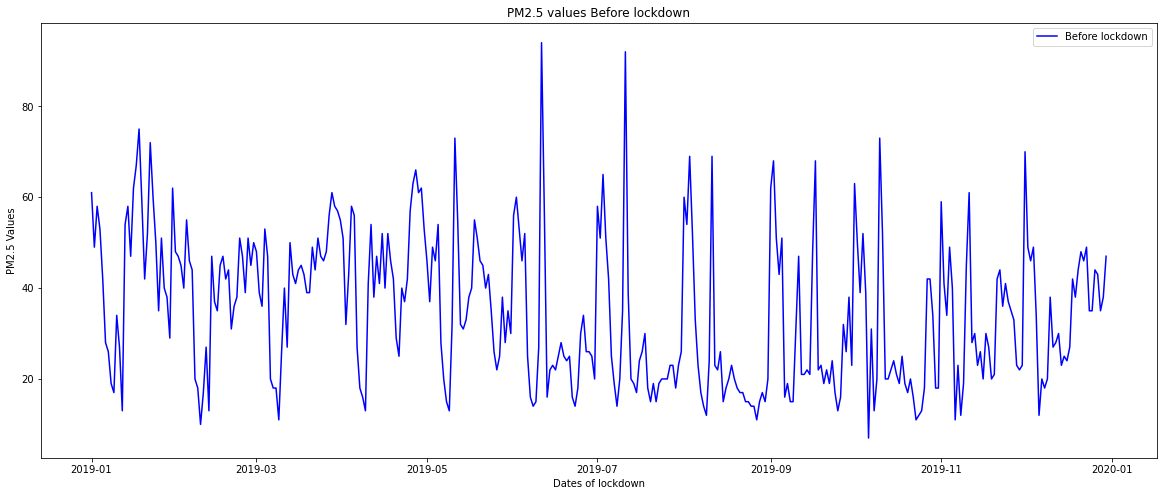

In [21]:
#PM2.5 value before lockdown
Dates=Data1['Date']
PM25=Data1['PM2.5']
PM25=[int(i) for i in PM25]
plt.figure(figsize=(20,8))
plt.plot(Dates,PM25,color='blue',label='Before lockdown')
plt.title('PM2.5 values Before lockdown')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 Values')
plt.legend()
plt.show()

In [22]:
#Extracting present 1 year Data 
mask=(Data['Date']>="2020-01-01")&(Data['Date']<'2020-12-30')
present1=Data.loc[mask]
present1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
365,Bengaluru,2020-01-01,30.71,70.80,9.03,27.31,26.74,13.01,1.07,8.56,37.39,1.05,36.19,NaN,82,Satisfactory
366,Bengaluru,2020-02-01,25.78,62.73,8.81,28.05,30.18,12.40,1.16,7.52,33.11,0.95,34.36,NaN,81,Satisfactory
367,Bengaluru,2020-03-01,29.66,69.62,6.62,26.26,26.92,12.87,0.99,6.40,32.98,1.06,29.06,NaN,85,Satisfactory
368,Bengaluru,2020-04-01,52.62,106.81,15.46,31.56,41.89,14.59,1.39,6.94,37.35,1.50,35.36,NaN,95,Satisfactory
369,Bengaluru,2020-05-01,52.64,97.94,6.86,29.10,29.52,15.68,1.01,7.01,45.10,1.19,39.99,NaN,118,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,Bengaluru,2020-12-25,57.89,102.48,10.72,33.44,33.96,16.55,0.93,5.24,54.00,0.82,2.16,NaN,103,Moderate
725,Bengaluru,2020-12-26,59.38,100.47,10.07,33.70,33.88,16.61,1.01,5.27,55.22,0.71,1.95,NaN,118,Moderate
726,Bengaluru,2020-12-27,57.28,107.80,12.41,31.17,34.50,16.37,0.90,5.67,55.30,0.38,1.66,NaN,117,Moderate
727,Bengaluru,2020-12-28,68.37,111.01,9.44,31.77,32.00,17.22,0.91,6.12,57.62,0.37,1.31,NaN,123,Moderate


[]

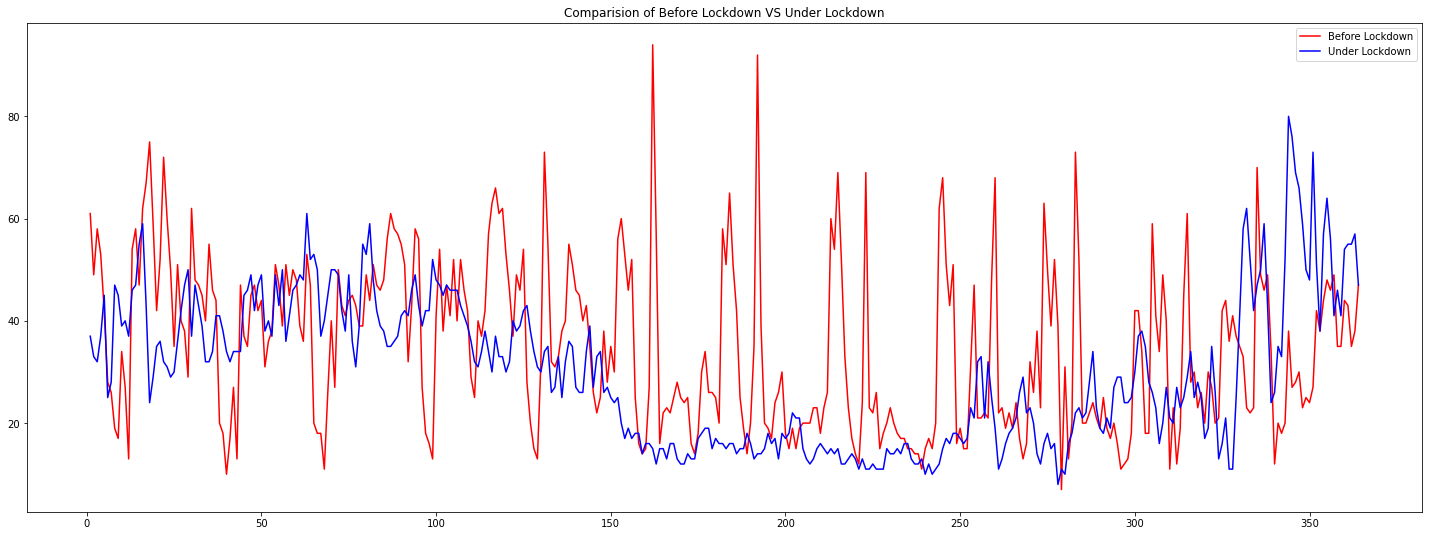

In [23]:
#PM2.5 in air Before VS Under Lockdown
Dates=Data1['Date']
PM25_l=Data1['PM2.5']
PM25_l=[int(i) for i in PM25]

PM25_n=present1['O3']
PM25_n=[int(i) for i in PM25_n]

plt.figure(figsize=(25,9))

length=[i for i in range(1,len(Dates)+1)]
plt.plot(length,PM25_l,color='red',label="Before Lockdown")
plt.plot(length,PM25_n,color='blue',label="Under Lockdown")
plt.title("Comparision of Before Lockdown VS Under Lockdown")
plt.legend()
plt.plot()

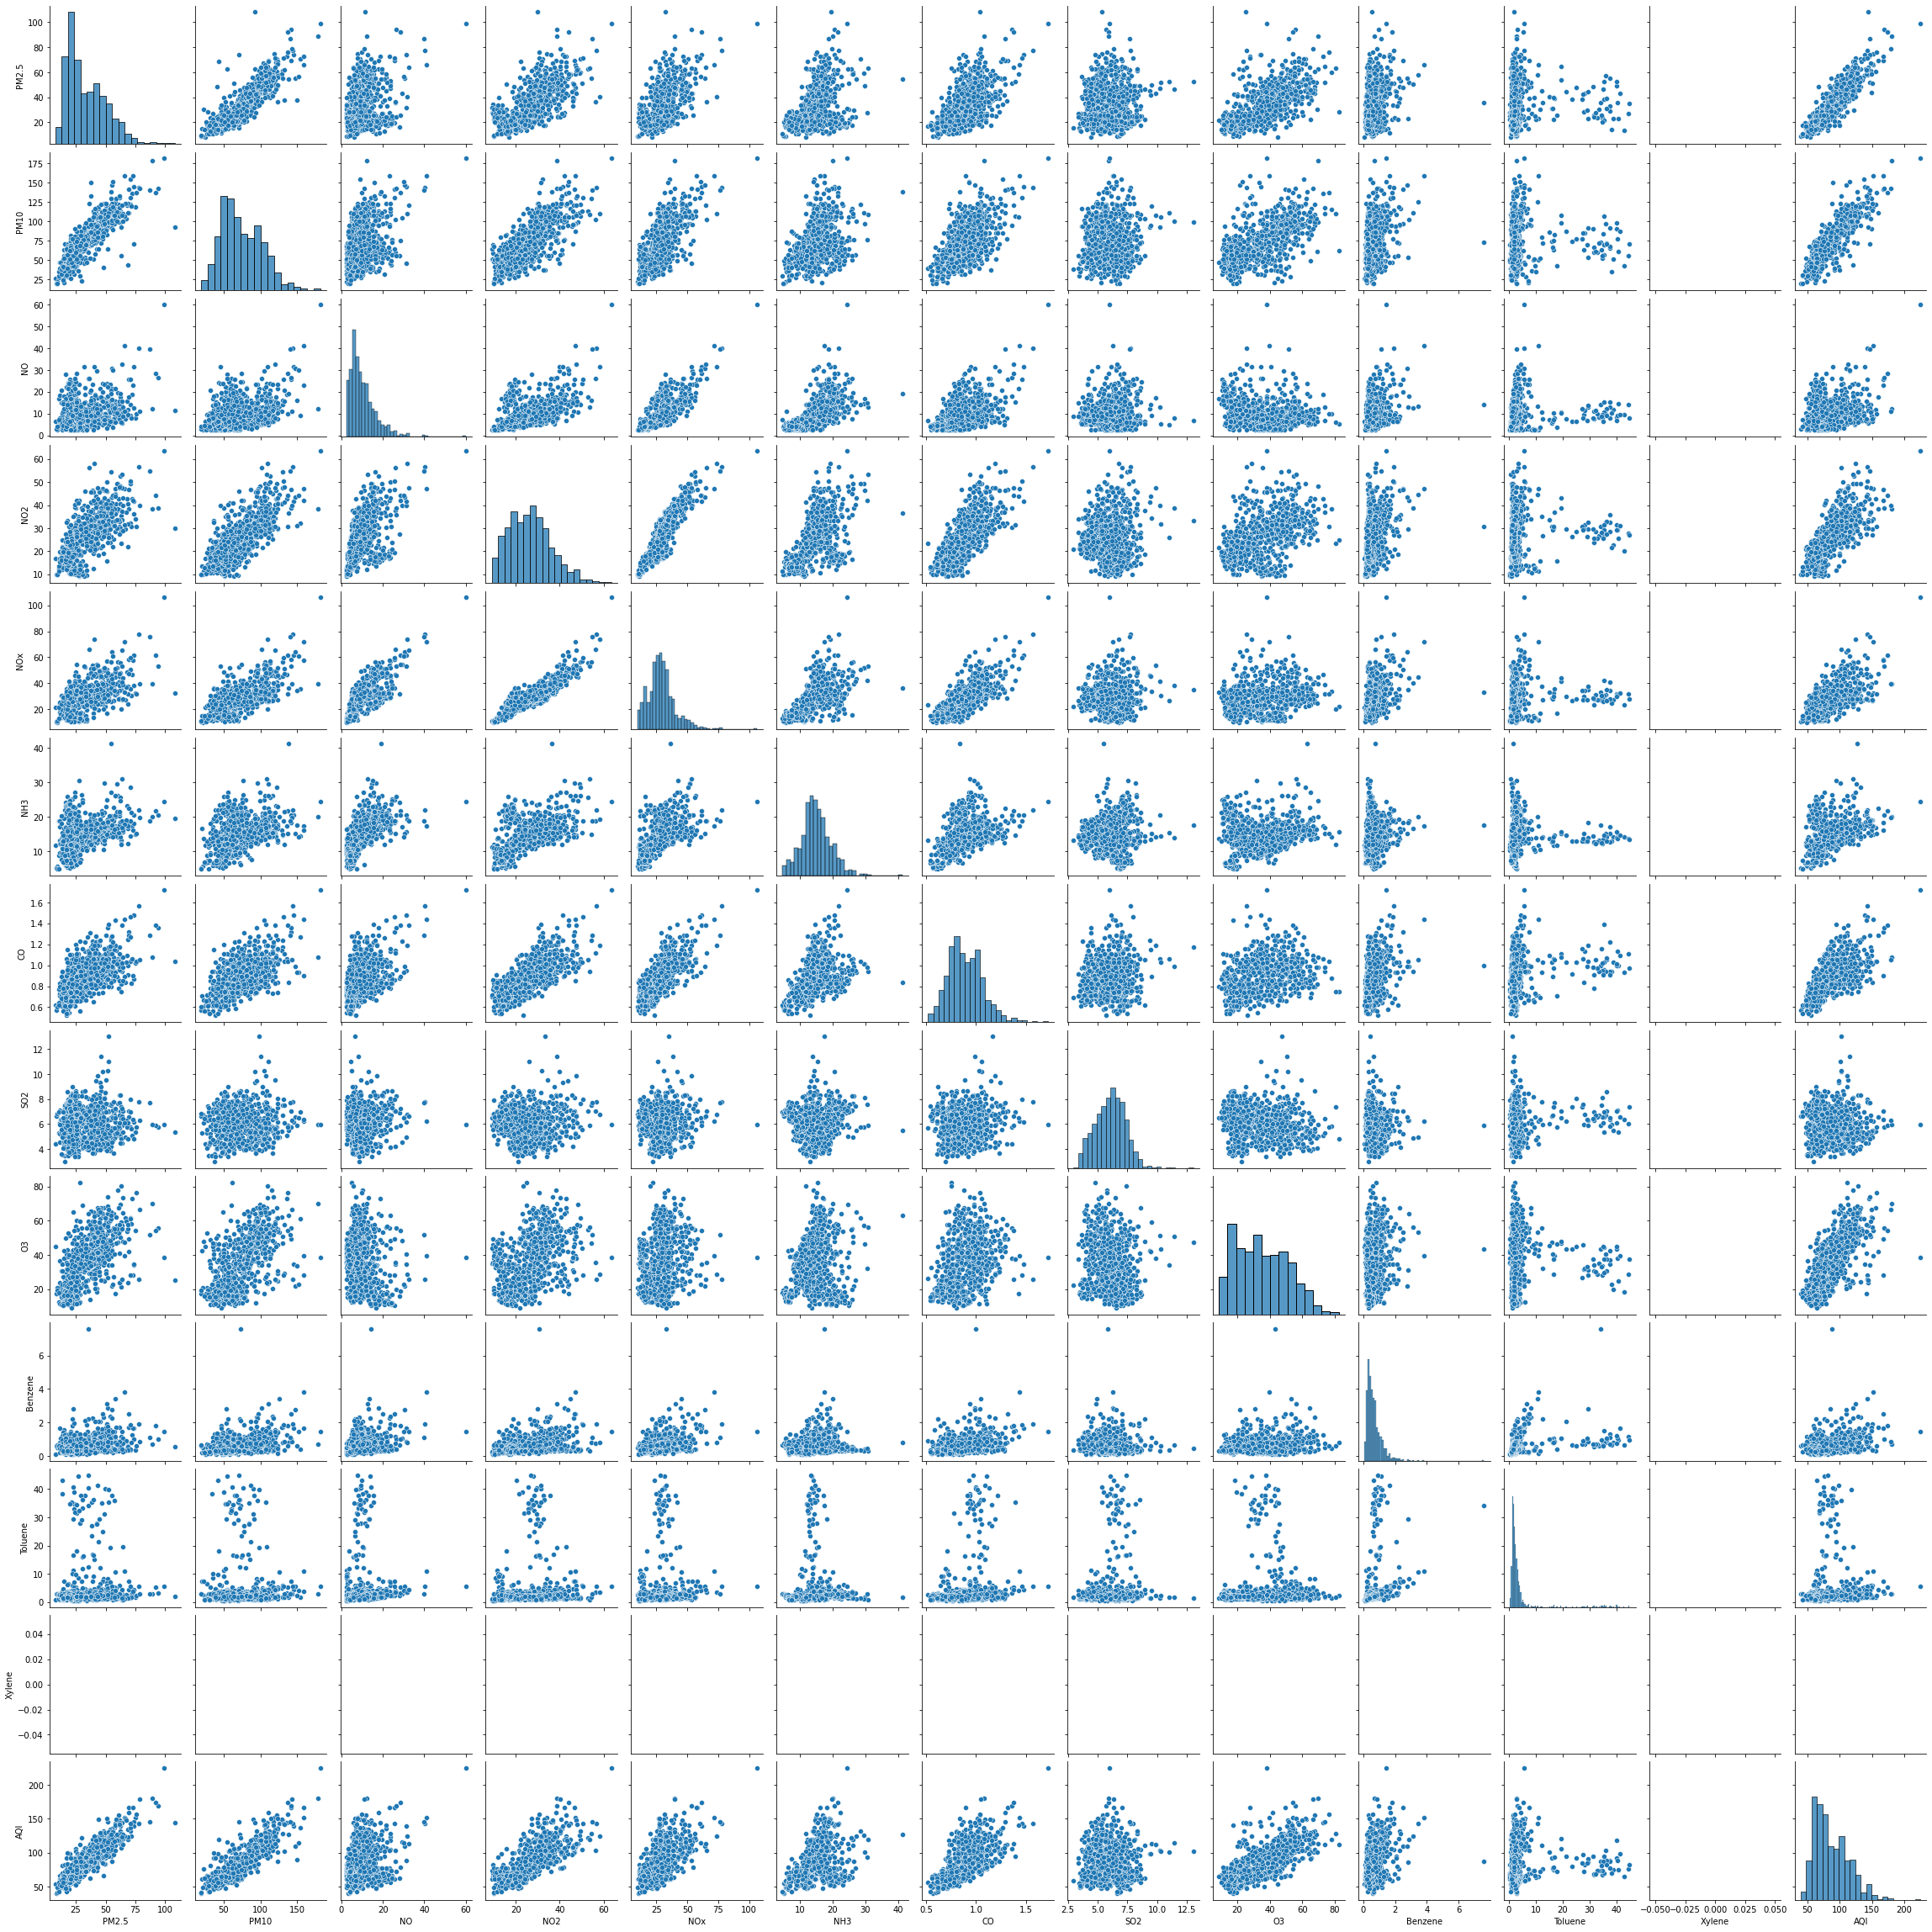

In [24]:
sns.pairplot(Data)

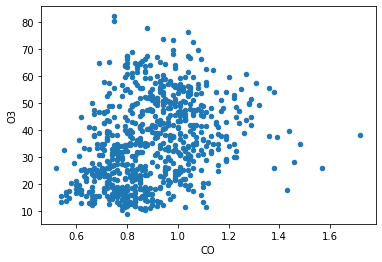

In [25]:
#scatter plot for CO and O3 in air
Data.plot(kind='scatter',x='CO',y='O3')
plt.show()

<AxesSubplot:ylabel='Frequency'>

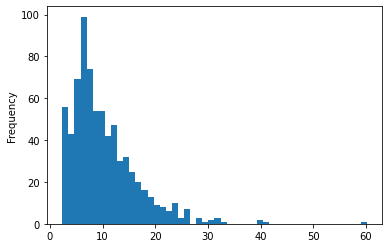

In [26]:
Data["NO"].plot.hist(bins=50)

In [27]:
#Minimum value of PM10 under Lockdown
Data1["PM10"]=[int(i) for i in Data1["PM10"]]
print(Data1[Data1.PM10 ==Data1.PM10 .min()])

          City       Date  PM2.5  PM10    NO    NO2    NOx    NH3    CO   SO2  \
160  Bengaluru 2019-10-06   7.85    25  6.28  16.77  21.21  11.79  0.62  4.44   

       O3  Benzene  Toluene  Xylene  AQI    AQI_Bucket  
160  45.0     0.08     0.65     NaN   54  Satisfactory  


In [28]:
#Minimum PM10 value Before Lockdown
Data1["PM10"]=[int(i) for i in Data1["PM10"]]
print("Minimum PM10 value Before lockdown:")
print(Data1[Data1.PM10==Data1.PM10.min()])

#Minimum PM10 value under Lockdown
Data["PM10"]=[int(i) for i in Data["PM10"]]
print("\nMinimum PM10 value under lockdown:")
print(Data[Data.PM10==Data.PM10.min()])

Minimum PM10 value Before lockdown:
          City       Date  PM2.5  PM10    NO    NO2    NOx    NH3    CO   SO2  \
160  Bengaluru 2019-10-06   7.85    25  6.28  16.77  21.21  11.79  0.62  4.44   

       O3  Benzene  Toluene  Xylene  AQI    AQI_Bucket  
160  45.0     0.08     0.65     NaN   54  Satisfactory  

Minimum PM10 value under lockdown:
          City       Date  PM2.5  PM10    NO   NO2    NOx   NH3    CO   SO2  \
518  Bengaluru 2020-02-06   8.95    19  3.09  9.76  10.18  5.13  0.57  6.65   
519  Bengaluru 2020-03-06   9.69    19  4.22  9.78  10.90  4.92  0.60  6.85   

        O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
518  17.46     0.59     2.72     NaN   40       Good  
519  19.62     0.67     2.76     NaN   42       Good  


In [29]:
#Maximum PM10 value Under Lockdown
Data["PM10"]=[int(i) for i in Data["PM10"]]
print("Maximum PM10 value Under lockdown:")
print(Data[Data.PM10==Data.PM10.max()])

#Maximum PM10 value Before Lockdown
Data1["PM10"]=[int(i) for i in Data1["PM10"]]
print("\nMaximum PM10 value Before lockdown:")
print(Data1[Data1.PM10==Data1.PM10.max()])

Maximum PM10 value Under lockdown:
          City       Date  PM2.5  PM10     NO    NO2     NOx    NH3    CO  \
717  Bengaluru 2020-12-18  98.84   181  60.14  63.57  106.26  24.42  1.72   

      SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
717  5.98  38.34     1.46     5.51     NaN  225       Poor  

Maximum PM10 value Before lockdown:
         City       Date  PM2.5  PM10     NO    NO2    NOx    NH3    CO   SO2  \
65  Bengaluru 2019-07-03  65.98   158  41.22  47.25  71.78  17.42  1.44  6.25   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
65  39.54     3.82    10.92     NaN  152   Moderate  


In [30]:
#Average CO in the air before Lockdown
Data["CO"]=[int(i) for i in Data["CO"]]
avgCO=Data['CO'].mean()
print("The average value of CO in air Before lockdown is:",avgCO)

#Average CO in the air during Lockdown
Data1["CO"]=[int(i) for i in Data1["CO"]]
avgCO=Data1['CO'].mean()
print("The average value of CO in air Under Lockdown is:",avgCO)

The average value of CO in air Before lockdown is: 0.2694938440492476
The average value of CO in air Under Lockdown is: 0.29120879120879123


# Splitting the dataset into training and testing set

In [31]:
x=Data.iloc[:,2:13].values
y=Data.iloc[:,-2].values

In [32]:
x

array([[ 61.55, 107.  ,  14.75, ...,  56.91,   0.33,   1.24],
       [ 47.27,  92.  ,  12.94, ...,  51.25,   0.32,   1.25],
       [ 48.86,  96.  ,  16.74, ...,  46.4 ,   0.4 ,   1.66],
       ...,
       [ 65.81, 106.  ,  11.15, ...,  47.62,   0.28,   1.11],
       [ 64.29, 100.  ,   8.74, ...,  64.73,   0.24,   0.9 ],
       [ 63.77, 107.  ,  15.48, ...,  55.18,   0.39,   1.44]])

In [33]:
y

array([128, 103, 101, 106, 104, 115, 120, 120, 122, 120, 126, 132, 125,
       111, 109, 113, 121, 152, 122, 106, 101, 145, 156, 130, 109, 102,
       101,  99,  83, 107, 132, 109, 104, 101,  81,  92, 120, 146, 113,
       134, 112,  80,  84,  96,  89, 103, 107, 123, 116, 116,  87,  85,
        99, 105, 110, 103, 120, 115, 125, 143, 107, 114, 123, 118, 128,
       152, 167, 151, 100,  91, 105, 113, 118, 106, 108, 115, 123, 113,
       102, 120, 122, 119, 120,  97, 113, 129, 148, 149, 137, 135, 126,
       136, 135, 127, 130, 130, 127, 125, 149, 123, 112, 130, 109, 106,
       111, 115, 124, 127, 107, 122, 106, 107, 112, 108, 126, 144, 150,
       141, 140, 124, 111, 103, 112, 120, 132, 131, 113,  87, 106, 120,
       105, 101, 106,  88,  96, 102, 110, 121, 116, 109, 109, 107, 102,
        92,  82,  91,  92,  92, 112,  98, 101,  89, 100,  98,  69,  78,
        78, 102,  76,  66,  54,  50,  51,  50,  59,  69,  63,  61,  70,
        74,  67,  64,  67,  66,  65,  65,  74,  72,  72,  79,  6

In [34]:
#test and train split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=0)

In [35]:
print(xtrain.shape,ytrain.shape)

(438, 11) (438,)


In [36]:
print(xtest.shape,ytest.shape)

(293, 11) (293,)


In [37]:
linreg=LinearRegression()

In [38]:
linreg.fit(xtrain,ytrain)

LinearRegression()

In [39]:
ypred=linreg.predict(xtest)

In [40]:
linreg.score(xtest,ytest)

0.8902079198374758

# Checking Accuracy

In [41]:
print('Interception:',linreg.intercept_)

Interception: 28.314043297937985


In [42]:
# The coefficients
print('Coefficients: \n',linreg.coef_)

Coefficients: 
 [ 0.80444495  0.18913795  0.21325594  0.23113025  0.04095123 -0.04746652
  2.46087231 -0.82997617  0.36251396  2.54913677 -0.19752578]


In [43]:
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(ytest, ypred))

Mean squared error: 67.21


In [44]:
# The coefficient of determination
print('Coefficient of determination: %.2f'% r2_score(ytest, ypred))

Coefficient of determination: 0.89


In [45]:
# the r squared value
print('R squared value: %.2f'%r2_score(ytest, ypred))

R squared value: 0.89
